# Artificial Neural Network
## Implementation of Perceptron Model to realize AND, OR, NAND, NOR and XOR gates
The Perceptron Network consists of a single output/hidden layer having a single hidden unit(neuron). The dataset is a sequences of 2-d array of 1's and 0's, the class label for each row would either 1 or 0, depending upon the result of the logical operations(AND, OR, NOR, XOR). The objective is to train the network on all of the 2-d dataset and fit the model to the training set.  

In [179]:
# Importing libs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'

from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

### Define logic Gates functions 

In [45]:
# Logical OR
def _or(X):
    return int(np.any(X))

# Logical AND
def _and(X):
    return int(np.all(X))

# Logical NAND
def _nand(X):
    return int(not(np.all(X)))

# Logical NOR
def _nor(X):
    return int(not(np.any(X)))

# Logical XOR
def _xor(X):
    t = X[0]
    for i in range(1, len(X)):
        t = t ^ X[i]
    return t                    
    

### Define activation function $hardlim()$

In [46]:
# define the activation function
def hardlim(x_input, weight):
    # hadamart/dot/inner product of the input vector and weight 
    res = np.dot(x_input, weight)  
    return 1 if res >= 0 else 0 

### Generate dataset 

In [47]:
# Generate Dataset
# Dataset consists of (150x2) of zeros and ones
dimension = 2
dataset = np.random.randint(0, 2, (100, dimension))
# Manually add "all 1's" sequences to get more balanced dataset  
dataset = np.concatenate((dataset, np.ones((50, dimension), dtype=int)))
# Shuffle the dataset
np.random.shuffle(dataset)

### Generate class Label upon each Logic Gates 

In [48]:
# Compute Label upon the logic gate operation 
# np.apply_along_axis: do operation columnwise (X1 op X2 = Y) 
y_and = np.apply_along_axis(_and, 1, dataset)
y_or = np.apply_along_axis(_or, 1, dataset)
y_nand = np.apply_along_axis(_nand, 1, dataset)
y_nor = np.apply_along_axis(_nor, 1, dataset)
y_xor = np.apply_along_axis(_xor, 1, dataset)

### Adding Gaussian noise to the dataset 

In [49]:
## Add Gaussian Noise to Dataset
noisy_dataset = dataset + np.random.normal(0, 0.05, size=dataset.shape)

## Add bias to dataset (an extra column of 1's in the beginning)
noisy_dataset = np.hstack((np.ones((noisy_dataset.shape[0], 1)), noisy_dataset))

### Plotting datasets

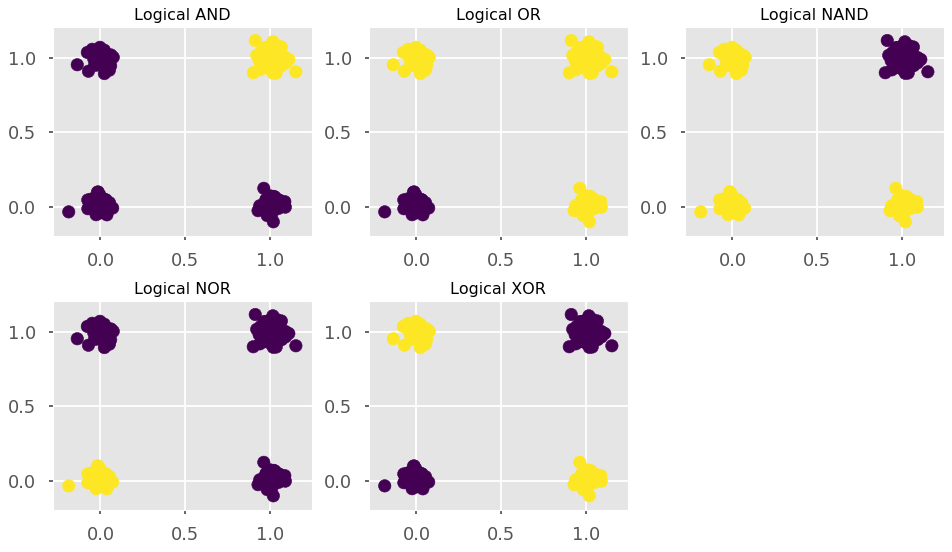

In [222]:
## Plot Points before adding bias
plt.figure(dpi=80)

# AND
plt.subplot(2,3,1)
plt.scatter(noisy_dataset[:,1], noisy_dataset[:,2], c=y_and)
plt.title("Logical AND")

# OR
plt.subplot(2,3,2)
plt.scatter(noisy_dataset[:,1], noisy_dataset[:,2], c=y_or)
plt.title("Logical OR")

# NAND
plt.subplot(2,3,3)
plt.scatter(noisy_dataset[:,1], noisy_dataset[:,2], c=y_nand)
plt.title("Logical NAND")

# NOR
plt.subplot(2,3,4)
plt.scatter(noisy_dataset[:,1], noisy_dataset[:,2], c=y_nor)
plt.title("Logical NOR")

# XOR
plt.subplot(2,3,5)
plt.scatter(noisy_dataset[:,1], noisy_dataset[:,2], c=y_xor)
plt.title("Logical XOR")

plt.tight_layout()
plt.show()

### Train Weights vector 
The `fit()` function trains the perceptron model upon the perceptron training rule by finding the optimal set of `Weights` for the input sequences then the error at each iteration as well as the accuracy. The optimal weights will be used as the Slope of the decision boundary given by the equation $W\,x + b$

In [223]:
def fit(X, Y, default_weights, epochs=5):
    w = default_weights
    error = []
    accuracy = []
    cum_accuracy = 0
    iteration = 0
    
    for i in range(0, epochs):
        for x,y in zip(X, Y):
            # increase total iteration(used to compute cummulative accuracy)
            iteration += 1 
            # compute y_predict 
            y_predict = hardlim(x, w)
            if y_predict == 1 and y == 0:
                # False Positive, decrease weights 
                w = w - x
            elif y_predict == 0 and y == 1:
                # False Negative, increase weights
                w = w + x
            else:
                # Correct prediction, so do not change weights
                cum_accuracy = cum_accuracy + 1
            # Compute Mean-Squared-Error
            error.append(0.5 * (y - y_predict)**2)
            # Compute Cumulative Accuracy
            accuracy.append(cum_accuracy / iteration)
    
    return w, error, accuracy

In [224]:
# Define the prediction function using Hardlim() as activation function 
def predict(X, weight):
    y_predict = np.array([])
    for row in X:
        y_predict = np.append(y_predict, hardlim(row, weight))
    return y_predict

### Train and test Logic AND gate function 

In [225]:
# Choose random weights[1, -1] (with bias[1])
weights_and = np.array([1, -1, 1])
# Split dataset into training and validation set
Xand_train, Xand_test, yand_train, yand_test = train_test_split(noisy_dataset, y_and, test_size=0.3)
# Train a perceptron model
# Epoch = 3
w_and, error_and, accuracy_and = fit(Xand_train, yand_train, weights_and, 3)
# Print final Weight vector 
print("Final weight vector: {}".format(w_and))

# Predict classes for the validation set
yand_predict = predict(Xand_test, w_and)
cm_and = confusion_matrix(yand_test, yand_predict)
score_and = accuracy_score(yand_test, yand_predict)
print("Confusion matrix: \n{}".format(cm_and))
print("Accuracy score: \n{}".format(score_and))

Final weight vector: [-2.          1.01293377  1.78239578]
Confusion matrix: 
[[19  0]
 [ 0 26]]
Accuracy score: 
1.0


### Train and test Logic NAND gate function 

In [226]:
# Choose random weights[2, 0] (with bias[1])
weights_nand = np.array([2, 0, 1])
# Split dataset into training and validation set
Xnand_train, Xnand_test, ynand_train, ynand_test = train_test_split(noisy_dataset, y_nand, test_size=0.3)
# Train a perceptron model
# Epoch = 3
w_nand, error_nand, accuracy_nand = fit(Xnand_train, ynand_train, weights_nand, 3)
# Print final Weight vector 
print("Final weight vector: {}".format(w_nand))

# Predict classes for the validation set
ynand_predict = predict(Xnand_test, w_nand)
cm_nand = confusion_matrix(ynand_test, ynand_predict)
score_nand = accuracy_score(ynand_test, ynand_predict)
print("Confusion matrix: \n{}".format(cm_nand))
print("Accuracy score: \n{}".format(score_nand))

Final weight vector: [ 3.         -1.97579614 -1.9152086 ]
Confusion matrix: 
[[19  0]
 [ 0 26]]
Accuracy score: 
1.0


### Train and test Logic NOR gate function 

In [227]:
# Choose random weights[3, 0] (with bias[1])
weights_nor = np.array([3, 0, 1])
# Split dataset into training and validation set
Xnor_train, Xnor_test, ynor_train, ynor_test = train_test_split(noisy_dataset, y_nor, test_size=0.3)
# Train a perceptron model
# Epoch = 3
w_nor, error_nor, accuracy_nor = fit(Xnor_train, ynor_train, weights_nor, 3)
# Print final Weight vector 
print("Final weight vector: {}".format(w_nor))

# Predict classes for the validation set
ynor_predict = predict(Xnor_test, w_nor)
from sklearn.metrics import confusion_matrix
cm_nor = confusion_matrix(ynor_test, ynor_predict)
score_nor = accuracy_score(ynor_test, ynor_predict)
print("Confusion matrix: \n{}".format(cm_nor))
print("Accuracy score: \n{}".format(score_nor))

Final weight vector: [ 1.         -1.89995731 -1.95238509]
Confusion matrix: 
[[39  0]
 [ 0  6]]
Accuracy score: 
1.0


### Train and test Logic OR gate function 

In [228]:
# Choose random weights[3, 0] (with bias[1])
weights_or = np.array([3, 0, 1])
# Split dataset into training and validation set
Xor_train, Xor_test, yor_train, yor_test = train_test_split(noisy_dataset, y_or, test_size=0.3)
# Train a perceptron model
# Epoch = 3
w_or, error_or, accuracy_or = fit(Xor_train, yor_train, weights_or, 3)
# Print final Weight vector 
print("Final weight vector: {}".format(w_or))

# Predict classes for the validation set
yor_predict = predict(Xor_test, w_or)
cm_or = confusion_matrix(yor_test, yor_predict)
score_or = accuracy_score(yor_test, yor_predict)
print("Confusion matrix: \n{}".format(cm_or))
print("Accuracy score: \n{}".format(score_or))

Final weight vector: [-1.          1.88731255  1.86710081]
Confusion matrix: 
[[ 7  0]
 [ 0 38]]
Accuracy score: 
1.0


### Train and test Logic XOR gate function 

In [229]:
# Choose random weights[3, 0] (with bias[1])
weights_xor = np.array([3, 0, 1])
# Split dataset into training and validation set
Xxor_train, Xxor_test, yxor_train, yxor_test = train_test_split(noisy_dataset, y_xor, test_size=0.3)
# Train a perceptron model
# Epoch = 3
w_xor, error_xor, accuracy_xor = fit(Xxor_train, yxor_train, weights_xor, 3)
# Print final Weight vector 
print("Final weight vector: {}".format(w_xor))

# Predict classes for the validation set
yxor_predict = predict(Xxor_test, w_xor)
cm_xor = confusion_matrix(yxor_test, yxor_predict)
score_xor = accuracy_score(yxor_test, yxor_predict)
print("Confusion matrix: \n{}".format(cm_xor))
print("Accuracy score: \n{}".format(score_xor))

Final weight vector: [ 0.         -2.49147856  1.60882301]
Confusion matrix: 
[[29  2]
 [ 6  8]]
Accuracy score: 
0.8222222222222222


### Plot Error and Accuracy for AND function

Text(0, 0.5, 'Accuracy')

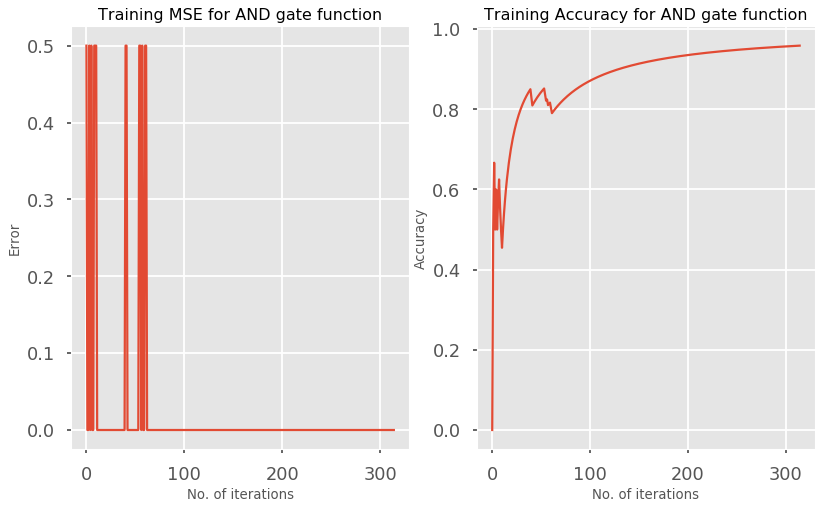

In [230]:
# Plot the Training Error Curve
x_ax_and = [i for i in range(0, len(error_and))]

#plt.figure(dpi = 100)
plt.figure(dpi = 80)
plt.subplot(1,2,1)
plt.plot(x_ax_and, error_and)
plt.title("Training MSE for AND gate function")
plt.xlabel("No. of iterations")
plt.ylabel("Error")

# Plot the Cumulative Training Accuracy
plt.subplot(1,2,2)
plt.plot(x_ax_and, accuracy_and)
plt.title("Training Accuracy for AND gate function")
plt.xlabel("No. of iterations")
plt.ylabel("Accuracy")

### Plot Error and Accuracy for NAND function

Text(0, 0.5, 'Accuracy')

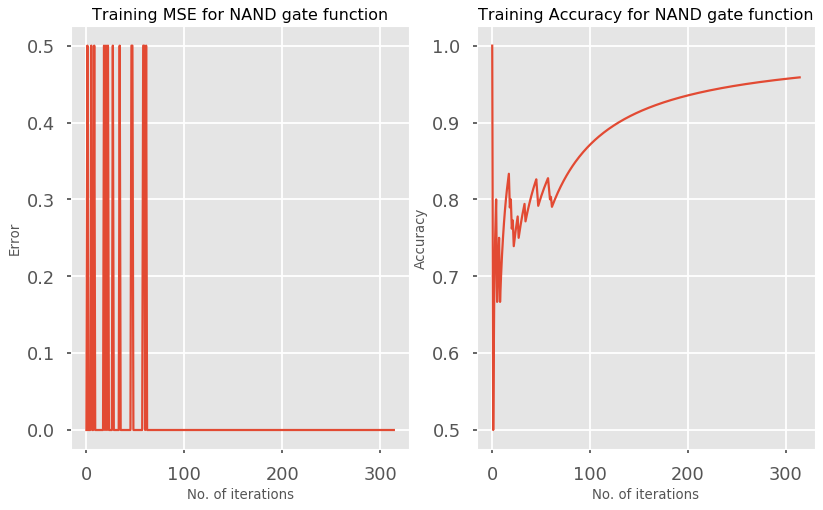

In [231]:
# Plot the Training Error Curve
x_ax_nand = [i for i in range(0, len(error_nand))]

#plt.figure(dpi = 100)
plt.figure(dpi = 80)
plt.subplot(1,2,1)
plt.plot(x_ax_nand, error_nand)
plt.title("Training MSE for NAND gate function")
plt.xlabel("No. of iterations")
plt.ylabel("Error")

# Plot the Cumulative Training Accuracy
plt.subplot(1,2,2)
plt.plot(x_ax_nand, accuracy_nand)
plt.title("Training Accuracy for NAND gate function")
plt.xlabel("No. of iterations")
plt.ylabel("Accuracy")

### Plot Error and Accuracy for NOR function

Text(0, 0.5, 'Accuracy')

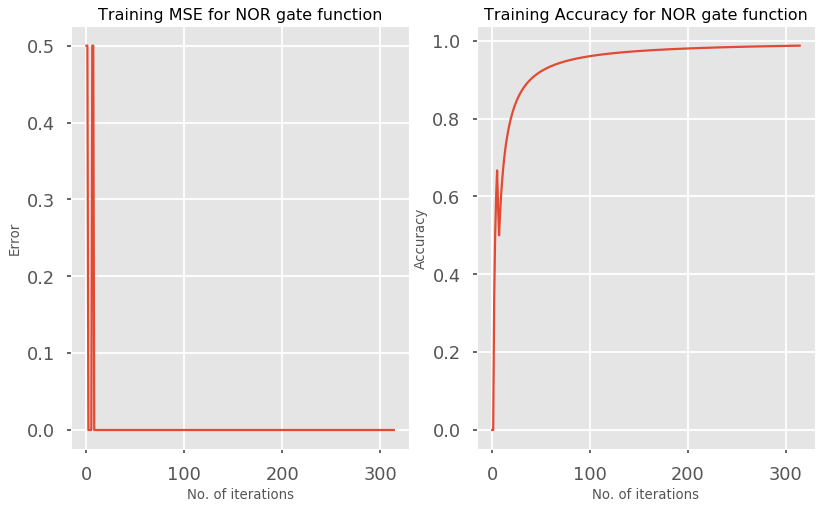

In [232]:
# Plot the Training Error Curve
x_ax_nor = [i for i in range(0, len(error_nor))]

#plt.figure(dpi = 100)
plt.figure(dpi = 80)
plt.subplot(1,2,1)
plt.plot(x_ax_nor, error_nor)
plt.title("Training MSE for NOR gate function")
plt.xlabel("No. of iterations")
plt.ylabel("Error")

# Plot the Cumulative Training Accuracy
plt.subplot(1,2,2)
plt.plot(x_ax_nor, accuracy_nor)
plt.title("Training Accuracy for NOR gate function")
plt.xlabel("No. of iterations")
plt.ylabel("Accuracy")

### Plot Error and Accuracy for OR function

Text(0, 0.5, 'Accuracy')

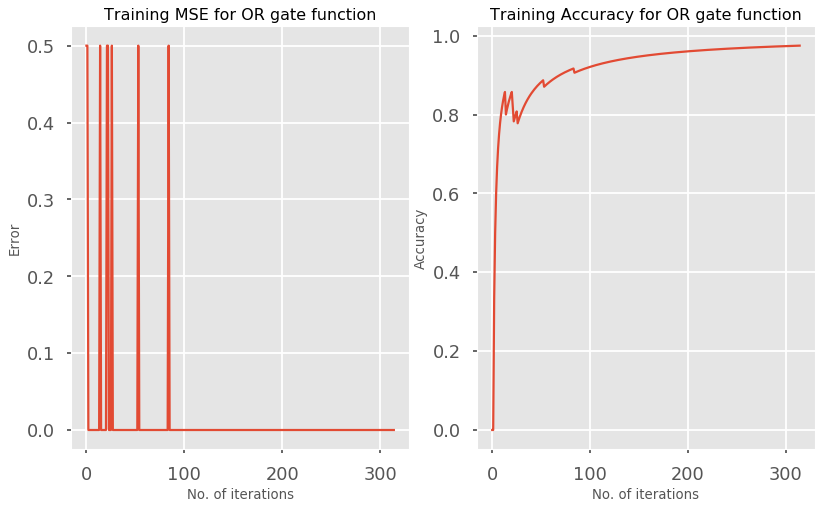

In [233]:
# Plot the Training Error Curve
x_ax_or = [i for i in range(0, len(error_or))]

#plt.figure(dpi = 100)
plt.figure(dpi = 80)
plt.subplot(1,2,1)
plt.plot(x_ax_or, error_or)
plt.title("Training MSE for OR gate function")
plt.xlabel("No. of iterations")
plt.ylabel("Error")

# Plot the Cumulative Training Accuracy
plt.subplot(1,2,2)
plt.plot(x_ax_or, accuracy_or)
plt.title("Training Accuracy for OR gate function")
plt.xlabel("No. of iterations")
plt.ylabel("Accuracy")

### Plot Error and Accuracy for XOR function

Text(0, 0.5, 'Accuracy')

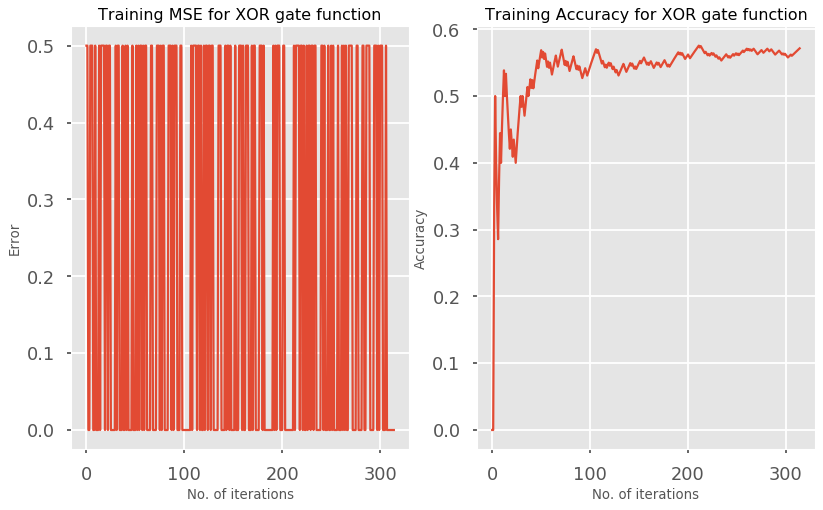

In [234]:
# Plot the Training Error Curve
x_ax_xor = [i for i in range(0, len(error_xor))]

#plt.figure(dpi = 100)
plt.figure(dpi = 80)
plt.subplot(1,2,1)
plt.plot(x_ax_xor, error_xor)
plt.title("Training MSE for XOR gate function")
plt.xlabel("No. of iterations")
plt.ylabel("Error")

# Plot the Cumulative Training Accuracy
plt.subplot(1,2,2)
plt.plot(x_ax_xor, accuracy_xor)
plt.title("Training Accuracy for XOR gate function")
plt.xlabel("No. of iterations")
plt.ylabel("Accuracy")

### Define the Decision Boundary function

In [235]:
# slope = -(b / w2) / (b / w1)
# y-intercept = -b / w2
# Final equation
# y = (-(b / w2) / (b / w1)).X + (-b / w2)

def decision_boundary(weight):
    slope = -(weight[0]/weight[2]) / (weight[0]/weight[1]) 
    y_intercept = -weight[0]/weight[2]
    x = np.arange(-0.2, 1.2, step=0.01, dtype=float)
    y = slope * x + y_intercept
    return x, y

### Plot decision boundary AND

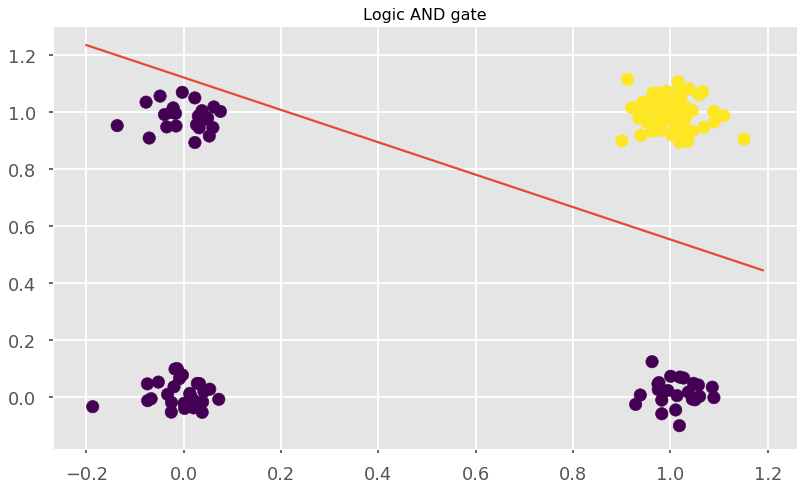

In [236]:
x, y = decision_boundary(w_and)
plt.figure(dpi=80)
plt.scatter(noisy_dataset[:,1], noisy_dataset[:,2], c=y_and)
plt.plot(x,y)
plt.title("Logic AND gate")
plt.show()

### Plot decision boundary NAND

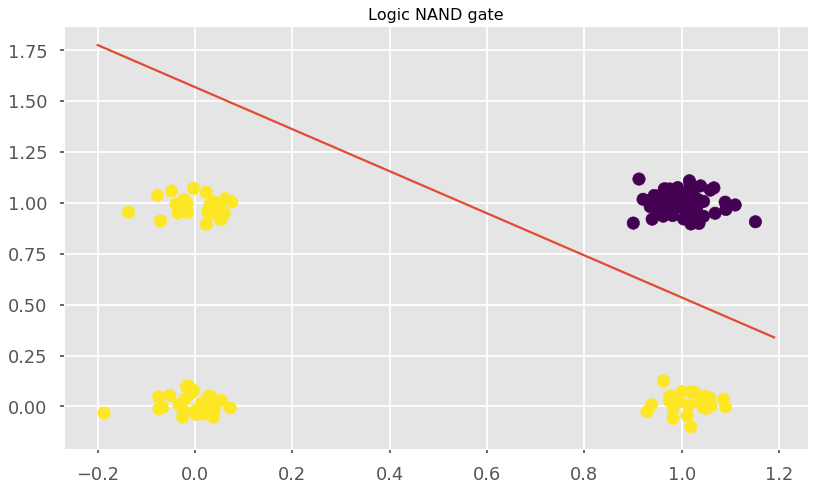

In [237]:
x, y = decision_boundary(w_nand)
plt.figure(dpi=80)
plt.scatter(noisy_dataset[:,1], noisy_dataset[:,2], c=y_nand)
plt.plot(x,y)
plt.title("Logic NAND gate")
plt.show()

### Plot decision boundary NOR

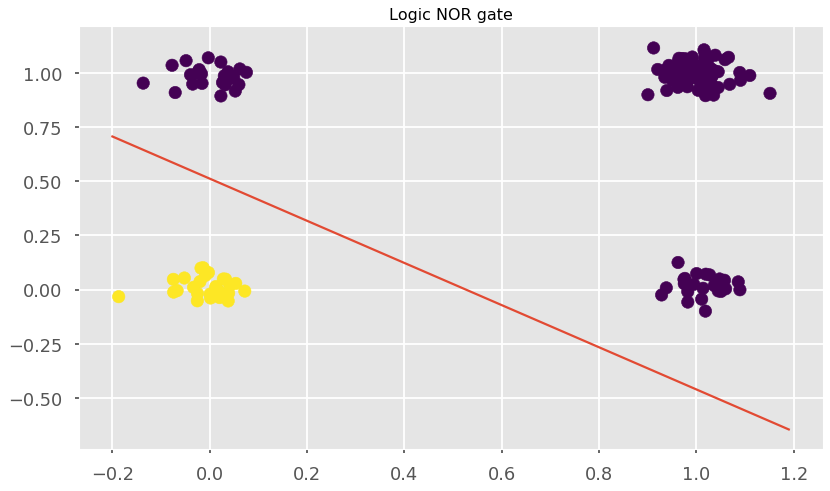

In [238]:
x, y = decision_boundary(w_nor)
plt.figure(dpi=80)
plt.scatter(noisy_dataset[:,1], noisy_dataset[:,2], c=y_nor)
plt.plot(x,y)
plt.title("Logic NOR gate")
plt.show()

### Plot decision boundary OR

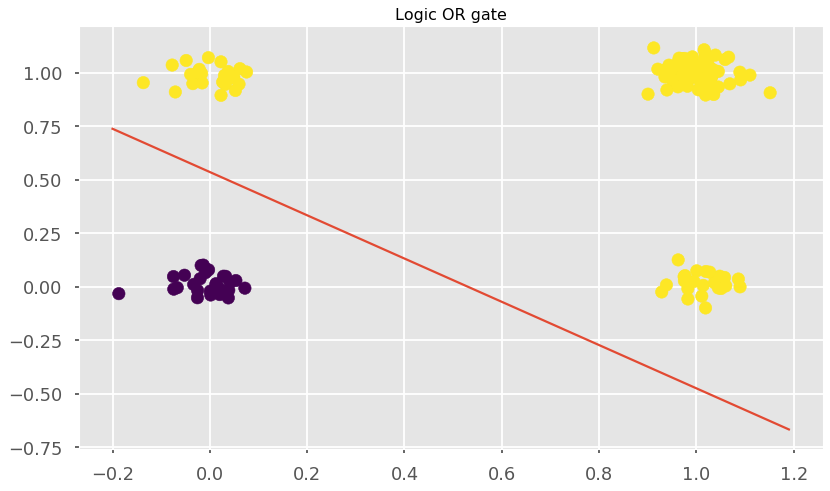

In [239]:
x, y = decision_boundary(w_or)
plt.figure(dpi=80)
plt.scatter(noisy_dataset[:,1], noisy_dataset[:,2], c=y_or)
plt.plot(x,y)
plt.title("Logic OR gate")
plt.show()

### Plot decision boundary XOR

/home/zero/anaconda/envs/amb-367/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


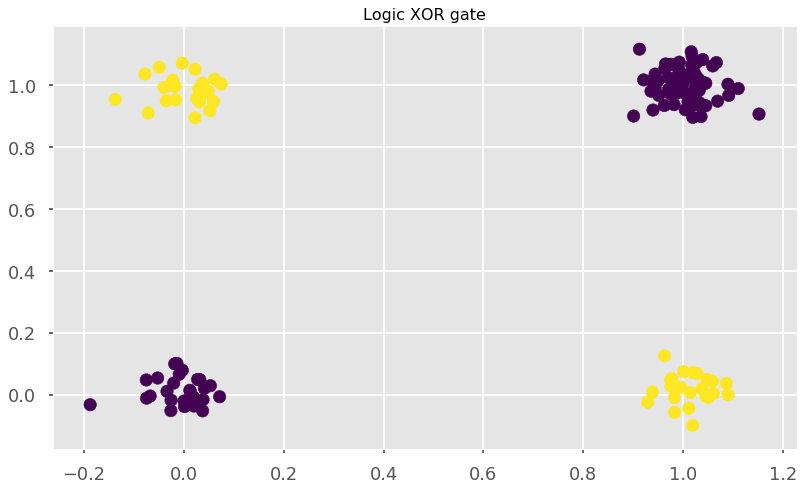

In [240]:
x, y = decision_boundary(w_xor)
plt.figure(dpi=80)
plt.scatter(noisy_dataset[:,1], noisy_dataset[:,2], c=y_xor)
plt.plot(x,y)
plt.title("Logic XOR gate")
plt.show()

#### As we encountered in this last plot, XOR function generates a non-linearly separable dataset in which we could not have been used a single hidden unit to make the above 2 classes linearly separable  